In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [64]:
flights = pd.read_csv("data/flights_no_outlier_iqr_time.csv")

In [66]:
passengers = pd.read_csv('data/passengers.csv')
passengers.shape

(300000, 38)

In [96]:
passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,4,4,120000,600,557,0,0,1447,811,685,...,US,United States,6,698,1,2019,10,3,F,DU
1,4,4,34600,148,102,0,0,296,373,316,...,US,United States,4,483,1,2017,5,1,F,DU
2,0,2,7000,18,14,0,0,48,44,36,...,US,United States,4,415,1,2017,12,1,L,DU
3,197,187,6954343,27683,21703,0,0,414,17908,13373,...,US,United States,6,694,1,2017,1,1,F,DU
4,0,2,69285,288,95,0,0,877,275,244,...,US,United States,6,617,1,2016,9,2,F,IU


In [86]:
airports_origin = pd.DataFrame(
    flights.groupby(['origin','origin_city_name'])['fl_date'].count().reset_index()
).rename({'fl_date': 'flight_count'}, axis=1)


airports_destination = pd.DataFrame(
    flights.groupby(['dest','dest_city_name'])['fl_date'].count().reset_index()
).rename({'fl_date': 'flight_count'}, axis=1)

In [87]:
airports_origin = airports_origin.sort_values(by='flight_count', ascending=False)[:10]
airports_destination = airports_destination.sort_values(by='flight_count', ascending=False)[:10]

In [89]:
airports_origin['id, city'] = airports_origin[['origin','origin_city_name']].agg(', '.join, axis=1)
airports_destination['id, city'] = airports_destination[['dest','dest_city_name']].agg(', '.join, axis=1)

In [94]:
passengers_airports_origin = pd.DataFrame(
                passengers.groupby(['origin','origin_city_name'])['passengers']
                .sum().reset_index()
).rename({'passengers': 'total_passengers'}, axis=1)

passengers_airports_origin = passengers_airports_origin.sort_values(by='total_passengers', ascending=False)[:10]


passengers_airports_destination = pd.DataFrame(
    passengers.groupby(['dest','dest_city_name'])['passengers']
    .sum().reset_index()
).rename({'passengers': 'total_passengers'}, axis=1)

passengers_airports_destination = passengers_airports_destination.sort_values(by='total_passengers', ascending=False)[:10]

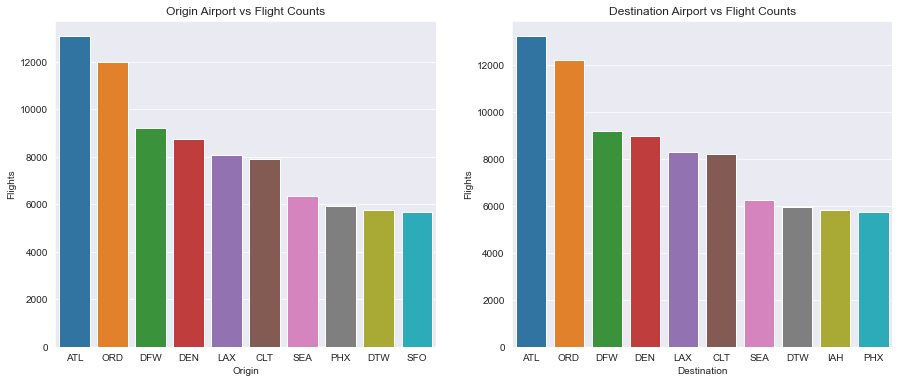

In [93]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

ax1 = sns.barplot(x='origin', y='flight_count', data=airports_origin, ax=axes[0])
ax2 = sns.barplot(x='dest', y='flight_count', data=airports_destination, ax=axes[1])

ax1.set(title='Origin Airport vs Flight Counts', xlabel='Origin', ylabel='Flights')
ax2.set(title='Destination Airport vs Flight Counts', xlabel='Destination', ylabel='Flights');

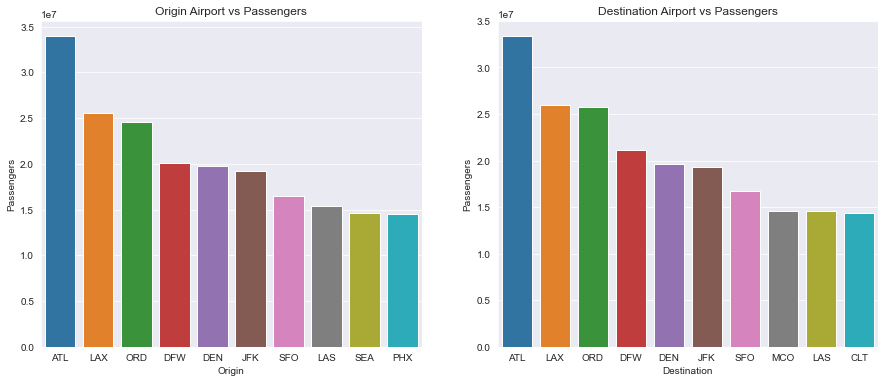

In [74]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

ax1 = sns.barplot(x='origin', y='total_passengers', data=passengers_airports_origin, ax=axes[0])
ax2 = sns.barplot(x='dest', y='total_passengers', data=passengers_airports_destination, ax=axes[1])

ax1.set(title='Origin Airport vs Passengers', xlabel='Origin', ylabel='Passengers')
ax2.set(title='Destination Airport vs Passengers', xlabel='Destination', ylabel='Passengers');

In [95]:
passengers_airports_origin

,origin,origin_city_name,total_passengers
111,ATL,"Atlanta, GA",33950453
827,LAX,"Los Angeles, CA",25501879
1123,ORD,"Chicago, IL",24576845
374,DFW,"Dallas/Fort Worth, TX",20102738
372,DEN,"Denver, CO",19755186
719,JFK,"New York, NY",19212605
1353,SFO,"San Francisco, CA",16536028
825,LAS,"Las Vegas, NV",15435931
1344,SEA,"Seattle, WA",14664828
1178,PHX,"Phoenix, AZ",14492825


In [98]:
pd.merge(airports_origin,passengers_airports_origin,how = "outer", on = "origin")

,origin,origin_city_name_x,flight_count,"id, city",origin_city_name_y,total_passengers
0,ATL,"Atlanta, GA",13070.0,"ATL, Atlanta, GA","Atlanta, GA",33950453.0
1,ORD,"Chicago, IL",12002.0,"ORD, Chicago, IL","Chicago, IL",24576845.0
2,DFW,"Dallas/Fort Worth, TX",9188.0,"DFW, Dallas/Fort Worth, TX","Dallas/Fort Worth, TX",20102738.0
3,DEN,"Denver, CO",8727.0,"DEN, Denver, CO","Denver, CO",19755186.0
4,LAX,"Los Angeles, CA",8054.0,"LAX, Los Angeles, CA","Los Angeles, CA",25501879.0
5,CLT,"Charlotte, NC",7922.0,"CLT, Charlotte, NC",NaN,NaN
6,SEA,"Seattle, WA",6328.0,"SEA, Seattle, WA","Seattle, WA",14664828.0
7,PHX,"Phoenix, AZ",5921.0,"PHX, Phoenix, AZ","Phoenix, AZ",14492825.0
8,DTW,"Detroit, MI",5735.0,"DTW, Detroit, MI",NaN,NaN
9,SFO,"San Francisco, CA",5691.0,"SFO, San Francisco, CA","San Francisco, CA",16536028.0
